## 1. Swedish demographic data (*)
#Go to Swedish-language wikipedia page Sveriges demografi.

In [438]:
import pandas as pd
import plotly_express as px 
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [479]:
link="https://sv.wikipedia.org/wiki/Sveriges_demografi"
import pandas as pd
tables=pd.read_html(link)
#tables

 # a)
  Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [440]:
from1900 = tables[5] # 0 is first table in the html page ,5 is sex table in this page
from1900=from1900.rename(columns={"Unnamed: 0": "År"})
from1900

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383
...,...,...,...,...,...,...,...,...,...
116,2016,9 995 000,117 425,90 982,26 443,118,92,26,185
117,2017,10 120 000,115 416,91 972,23 444,114,91,23,179
118,2018,10 230 000,115 832,92 185,23 647,113,90,23,175
119,2019,10 327 589,114 523,88 766,28 727,111,87,24,170


# b) 
Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

# Bar Chart

In [441]:

import matplotlib.pyplot as plt
import plotly_express as px 

fig=px.bar(from1900 ,y="År",x="Folkmängd",title="Sweden population 1900-2020",log_y=True,color="År")
fig.show()

Text(0.5, 1.0, 'Befolkningsförändringar vs År')

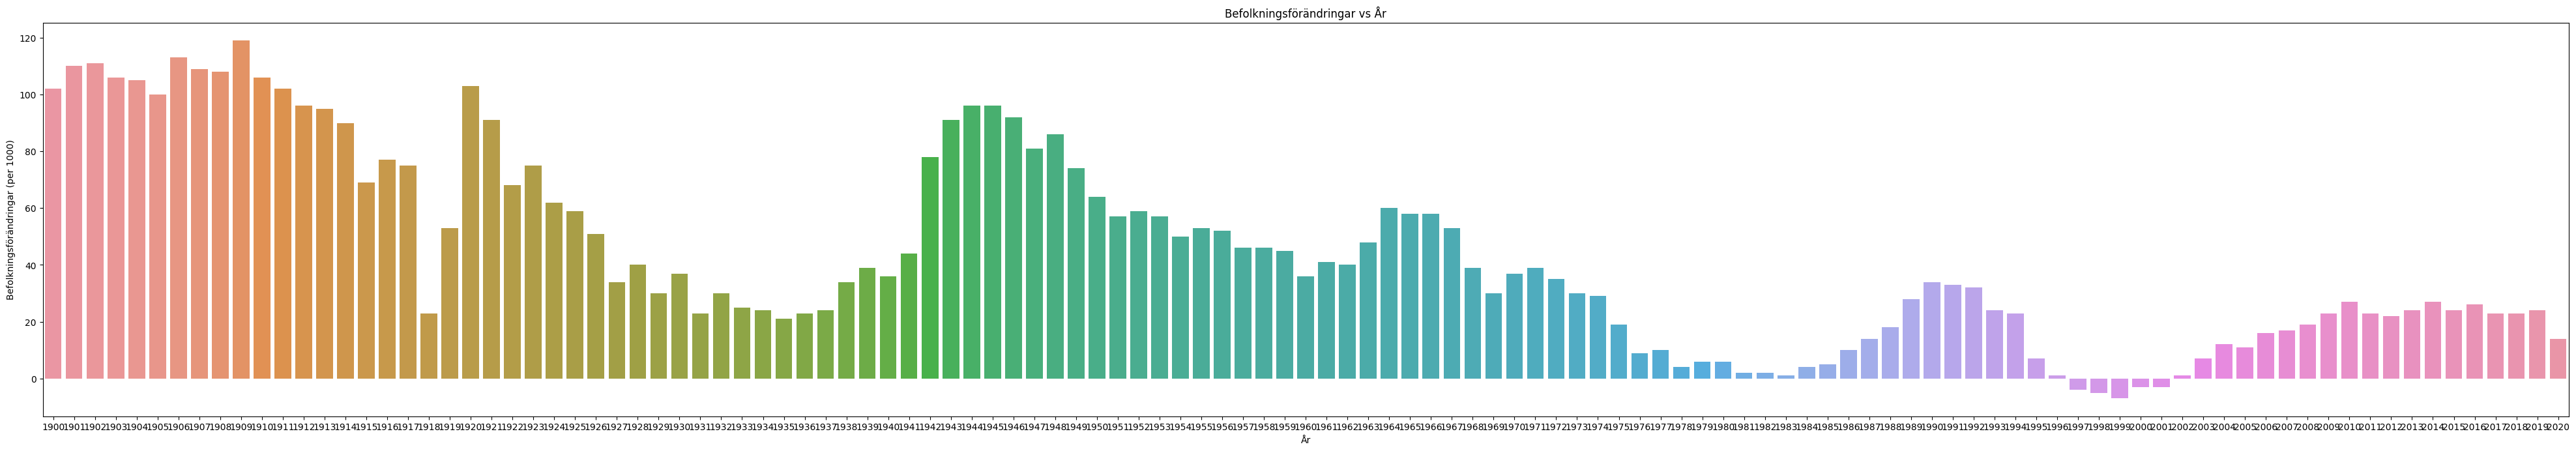

In [442]:
import seaborn as sns
fig = plt.figure(dpi=100, figsize=(50,8))
sns.barplot(data=from1900 , y="Befolkningsförändringar (per 1000)", x="År").set_title("Befolkningsförändringar vs År")

# Line Chart

In [443]:

fig=px.line(from1900,x="År",y="Folkmängd",title="Sweden population 1900-2020",range_x=[1900,2020],log_y=True)
fig.show()

#   c)
 Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [444]:
before1900 = tables[1] # 0 is first table in the html page ,5 is sex table in this page
before1900

Vid utgången av år  \
                                   Vid utgången av år   
0                                                1570   
1                                                1650   
2                                                1700   
3                                                1720   
4                                                1755   
5                                                1815   
6                                                1865   
7                                                1900   
8                                                2000   
9                                                2020   
10  Datan avser folkmängden inom Sveriges nuvarand...   

                                            Folkmängd  \
                                            Folkmängd   
0                                             900 000   
1                                           1 225 000   
2                                           1 485 000   
3                                           1 350 000   
4                                           1 878 000   
5                                           2 465 000   
6                                           4 099 000   
7                                           5 140 000   
8                                           8 861 000   
9                                          10 379 000   
10  Datan avser folkmängden inom Sveriges nuvarand...   

                                       Årlig tillväxt  \
                                               Totalt   
0                                                   —   
1                                               4 063   
2                                               5 200   
3                                              −6 750   
4                                              15 086   
5                                               9 783   
6                                              32 680   
7                                              29 743   
8                                                 NaN   
9                                                 NaN   
10  Datan avser folkmängden inom Sveriges nuvarand...   

                                                       
                                             Promille  
0                                                   —  
1                                                 386  
2                                                 386  
3                                               −4,75  
4                                                 948  
5                                                 454  
6                                                1022  
7                                                 648  
8                                                 NaN  
9                                                 NaN  
10  Datan avser folkmängden inom Sveriges nuvarand...

 # d) 
 Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.

In [445]:
# 这一步的目的是为了后面的合并做准备
new_from1900=from1900.iloc[:,[0,1,4,7]]# 利用iloc提取列数据,这里表示提取第一列，第二列，第五列和第八列
new_from1900.head()
# df_new=from1900.drop(["Födda",	"Döda", "Nativiteten (per 1000)",	"Dödstalen (per 1000)","Total fertilitet" ], axis=1)  # axis 默认为0，指删除行，因此删除columns时要指定axis=1；

,År,Folkmängd,Befolkningsförändringar,Befolkningsförändringar (per 1000)
0,1900,5 117 000,51 993,102
1,1901,5 156 000,56 598,110
2,1902,5 187 000,57 642,111
3,1903,5 210 000,55 286,106
4,1904,5 241 000,54 800,105


In [446]:
#保留到1865年的
new_before1900=before1900.drop(index=[7,8,9,10]).rename(columns={
                                                              "Vid utgången av år":"År",
                                                              "Totalt":"Befolkningsförändringar", 
                                                               "Promille": "Befolkningsförändringar (per 1000) "
                                                               }
                                                               )

                                       
new_before1900

År  Folkmängd          Årlig tillväxt                                    
     År  Folkmängd Befolkningsförändringar Befolkningsförändringar (per 1000) 
0  1570    900 000                       —                                   —
1  1650  1 225 000                   4 063                                 386
2  1700  1 485 000                   5 200                                 386
3  1720  1 350 000                  −6 750                               −4,75
4  1755  1 878 000                  15 086                                 948
5  1815  2 465 000                   9 783                                 454
6  1865  4 099 000                  32 680                                1022

In [447]:
import pandas as pd
merge_year=pd.concat([new_from1900,new_before1900],ignore_index=True)
merge_year

,"(Folkmängd, Folkmängd)","(År, År)","(Årlig tillväxt, Befolkningsförändringar)","(Årlig tillväxt, Befolkningsförändringar (per 1000) )",Befolkningsförändringar,Befolkningsförändringar (per 1000),Folkmängd,År
0,NaN,NaN,NaN,NaN,51 993,102.0,5 117 000,1900.0
1,NaN,NaN,NaN,NaN,56 598,110.0,5 156 000,1901.0
2,NaN,NaN,NaN,NaN,57 642,111.0,5 187 000,1902.0
3,NaN,NaN,NaN,NaN,55 286,106.0,5 210 000,1903.0
4,NaN,NaN,NaN,NaN,54 800,105.0,5 241 000,1904.0
...,...,...,...,...,...,...,...,...
123,1 485 000,1700,5 200,386,NaN,NaN,NaN,NaN
124,1 350 000,1720,−6 750,"−4,75",NaN,NaN,NaN,NaN
125,1 878 000,1755,15 086,948,NaN,NaN,NaN,NaN
126,2 465 000,1815,9 783,454,NaN,NaN,NaN,NaN


# e) 
Draw a graph of population data from 1570-2020.

In [480]:
import plotly_express as px 

fig = px.line(merge_year, x="År", y="Folkmängd", title="Population change 1570 - 2020")
                 
fig.show()


# 2. Denmark demographic data (*)
Go to the Danish-language wikipedia page Danmarks demografi.

  # a) 
  Read in the table under "Demografiske data" into a DataFrame (*)

 

In [481]:
link="https://da.wikipedia.org/wiki/Danmarks_demografi"
import pandas as pd
tables_danmark=pd.read_html(link)
#tables_danmark

In [450]:
danmark = tables_danmark[0] # 0 is first table in the html page ,5 is sex table in this page
danmark=danmark.rename (columns={"År.1": "År", 
                          "Befolkning pr. 1. januar.1": "Befolkning pr. 1. januar"}
                          )
danmark                         

,År,Befolkning pr. 1. januar,År,Befolkning pr. 1. januar
0,800,500.000[5],NaN,NaN
1,1200,1.000.000[5],NaN,NaN
2,1769,797.584,1976.0,5.065.313
3,1787,841.806,1977.0,5.079.879
4,1801,929.001,1978.0,5.096.959
5,1834,1.230.964,1979.0,5.111.537
6,1840,1.289.075,1980.0,5.122.065
7,1845,1.356.877,1981.0,5.123.989
8,1850,1.414.648,1982.0,5.119.155
9,1855,1.507.222,1983.0,5.116.464


 # b) 
  Clean the data and draw a graph of population against year from 1769-2020. (**)

In [451]:
danmark1=danmark.iloc[:,0:2] # 冒号前面是取第几行，冒号后面是取第1，2列
danmark1=danmark1.drop(index=[0,1]).reset_index(drop=True) #drop=true 去掉旧的INDEX,drop=false 保留旧的INDEX 且产生新的INDEX
danmark1.head()

,År,Befolkning pr. 1. januar
0,1769,797.584
1,1787,841.806
2,1801,929.001
3,1834,1.230.964
4,1840,1.289.075


In [452]:
danmark2=danmark.iloc[:,2:5].drop(index=[0,1]).reset_index(drop=True)
  # 冒号前面是取第几行，冒号后面是取第1，2列
#drop=true 去掉旧的INDEX,drop=false 保留旧的INDEX 且产生新的INDEx
danmark2["År"]=danmark2["År"].astype(int)
danmark2

,År,Befolkning pr. 1. januar
0,1976,5.065.313
1,1977,5.079.879
2,1978,5.096.959
3,1979,5.111.537
4,1980,5.122.065
5,1981,5.123.989
6,1982,5.119.155
7,1983,5.116.464
8,1984,5.112.130
9,1985,5.111.108


In [453]:
danmark_new=pd.concat([danmark1,danmark2])
danmark_new

,År,Befolkning pr. 1. januar
0,1769,797.584
1,1787,841.806
2,1801,929.001
3,1834,1.230.964
4,1840,1.289.075
...,...,...
27,2003,5.383.507
28,2005,5.411.405
29,2010,5.534.738
30,2015,5.659.715


# graph of population against year from 1769-2020

In [454]:
import plotly_express as px 

fig = px.line(danmark_new, x="År", y="Befolkning pr. 1. januar", title=" Danmark Population change 1769 - 2020")
                 
fig.show()

# 3. Norwegian demographic data (*)
Go to Swedish-language wikipedia page Norges demografi.

# a) 
Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [482]:
link="https://sv.wikipedia.org/wiki/Norges_demografi"
import pandas as pd 
tables_norge=pd.read_html(link)
#tables_norge

In [456]:
norge=tables_norge[2]
norge

,Unnamed: 0,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1000 invånare,Dödstal per 1000 invånare,Naturlig förändring per 1000 invånare,Total fertilitet
0,1900,2 231,66 229,35 345,30 884,297,158,138,NaN
1,1901,2 255,67 303,33 821,33 482,298,150,148,NaN
2,1902,2 276,66 494,31 670,34 824,292,139,153,NaN
3,1903,2 288,65 470,33 847,31 623,286,148,138,NaN
4,1904,2 298,64 143,32 895,31 248,279,143,136,NaN
...,...,...,...,...,...,...,...,...,...
108,2008,4 768,60 497,41 712,18 785,127,87,39,196.0
109,2009,4 829,61 807,41 449,20 358,128,86,42,198.0
110,2010,4 889,61 442,41 500,19 942,126,85,41,195.0
111,2011,4 953,60 220,41 393,18 827,121,83,38,188.0


In [457]:
norge_swe=Norge.rename(columns={"Unnamed: 0":"År",
                                 "Total fertilitet" :"Fertilitet",
                            "Befolkning i tusentals (x 1000)" :"Folkmängd" })
norge_swe=norge_swe.loc[:,["År","Folkmängd","Fertilitet"]]                           
norge_swe

,År,Folkmängd,Fertilitet
0,1900,2 231,NaN
1,1901,2 255,NaN
2,1902,2 276,NaN
3,1903,2 288,NaN
4,1904,2 298,NaN
...,...,...,...
108,2008,4 768,196.0
109,2009,4 829,198.0
110,2010,4 889,195.0
111,2011,4 953,188.0


# b) 
You see some missing data in column "Total fertilitet". Go to the English page and read in the data from "Vital statistics since 1900".

In [458]:
link="https://en.wikipedia.org/wiki/Demographics_of_Norway"
import pandas as pd 
tables_norge_eng=pd.read_html(link)
norge_eng=tables_norge_eng[13]
norge_eng

,Unnamed: 0,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rates[fn 1][5][7]
0,1900,2231000,66229.0,35345.0,30884.0,29.7,15.8,13.8,4.40
1,1901,2255000,67303.0,33821.0,33482.0,29.8,15.0,14.8,4.37
2,1902,2276000,66494.0,31670.0,34824.0,29.2,13.9,15.3,4.26
3,1903,2288000,65470.0,33847.0,31623.0,28.6,14.8,13.8,4.16
4,1904,2298000,64143.0,32895.0,31248.0,27.9,14.3,13.6,4.07
...,...,...,...,...,...,...,...,...,...
117,2017,5258000,56633.0,40774.0,15859.0,10.8,7.8,3.0,1.62
118,2018,5296000,55120.0,40840.0,14280.0,10.4,7.7,2.8,1.56
119,2019,5328000,54495.0,40684.0,13811.0,10.2,7.6,2.6,1.53
120,2020,5367580,52979.0,40611.0,12368.0,9.9,7.5,2.4,1.48


In [459]:
norge_eng=norge_eng.rename(columns={"Unnamed: 0": "År", 
                                      "Average population" :"Folkmängd",
                                   "Total fertility rates[fn 1][5][7]": "Fertilitet"})
norge_eng=norge_eng.loc[:,["År","Folkmängd","Fertilitet"]]
                                 
norge_eng

,År,Folkmängd,Fertilitet
0,1900,2231000,4.40
1,1901,2255000,4.37
2,1902,2276000,4.26
3,1903,2288000,4.16
4,1904,2298000,4.07
...,...,...,...
117,2017,5258000,1.62
118,2018,5296000,1.56
119,2019,5328000,1.53
120,2020,5367580,1.48


# c)
 Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet".

In [460]:
norge_eng

,År,Folkmängd,Fertilitet
0,1900,2231000,4.40
1,1901,2255000,4.37
2,1902,2276000,4.26
3,1903,2288000,4.16
4,1904,2298000,4.07
...,...,...,...
117,2017,5258000,1.62
118,2018,5296000,1.56
119,2019,5328000,1.53
120,2020,5367580,1.48


In [461]:
norge_swe

,År,Folkmängd,Fertilitet
0,1900,2 231,NaN
1,1901,2 255,NaN
2,1902,2 276,NaN
3,1903,2 288,NaN
4,1904,2 298,NaN
...,...,...,...
108,2008,4 768,196.0
109,2009,4 829,198.0
110,2010,4 889,195.0
111,2011,4 953,188.0


In [462]:
#merge 英文版本下获得的出生率到瑞典语版本的那个文档
#norge_eng=pd.concat[norge_swe.merge(norge_eng)]
norge_eng=norge_eng.merge(norge_swe)
norge_eng

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

# 4. Merge Sweden-Norway (*)
Create a population graph and a fertility graph showing Sweden and Norway.

Text(0.5, 1.0, 'Fertility Sweden')

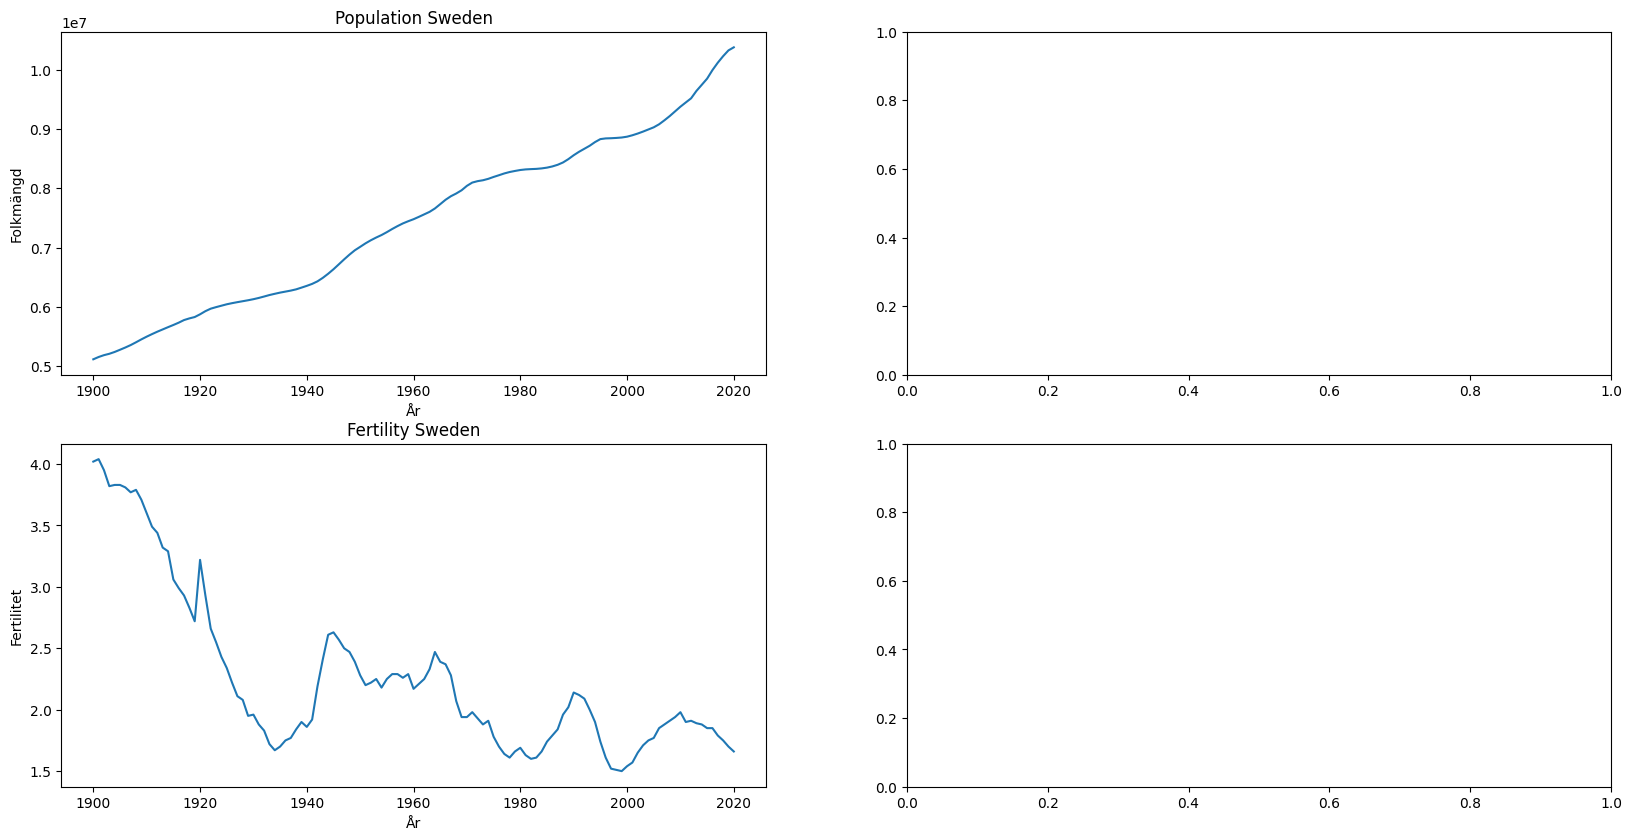

In [466]:
tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=',', thousands=' ', header=[0])
sweden = tables[5]
sweden = sweden.rename(columns={"Unnamed: 0": "År", "Total fertilitet": "Fertilitet"})
sweden

fig, ax = plt.subplots(2,2, dpi=100, figsize=(20,10))

sns.lineplot(data=sweden, x="År", y="Folkmängd", ax = ax[0,0]).set_title("Population Sweden")
sns.lineplot(data=sweden, x="År", y="Fertilitet", ax = ax[1,0]).set_title("Fertility Sweden")

In [463]:
from1900

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383
...,...,...,...,...,...,...,...,...,...
116,2016,9 995 000,117 425,90 982,26 443,118,92,26,185
117,2017,10 120 000,115 416,91 972,23 444,114,91,23,179
118,2018,10 230 000,115 832,92 185,23 647,113,90,23,175
119,2019,10 327 589,114 523,88 766,28 727,111,87,24,170


In [464]:
norge_eng

,År,Folkmängd,Fertilitet
0,1900,2231000,4.40
1,1901,2255000,4.37
2,1902,2276000,4.26
3,1903,2288000,4.16
4,1904,2298000,4.07
...,...,...,...
117,2017,5258000,1.62
118,2018,5296000,1.56
119,2019,5328000,1.53
120,2020,5367580,1.48


Text(0.5, 1.0, 'Fertility Sweden')

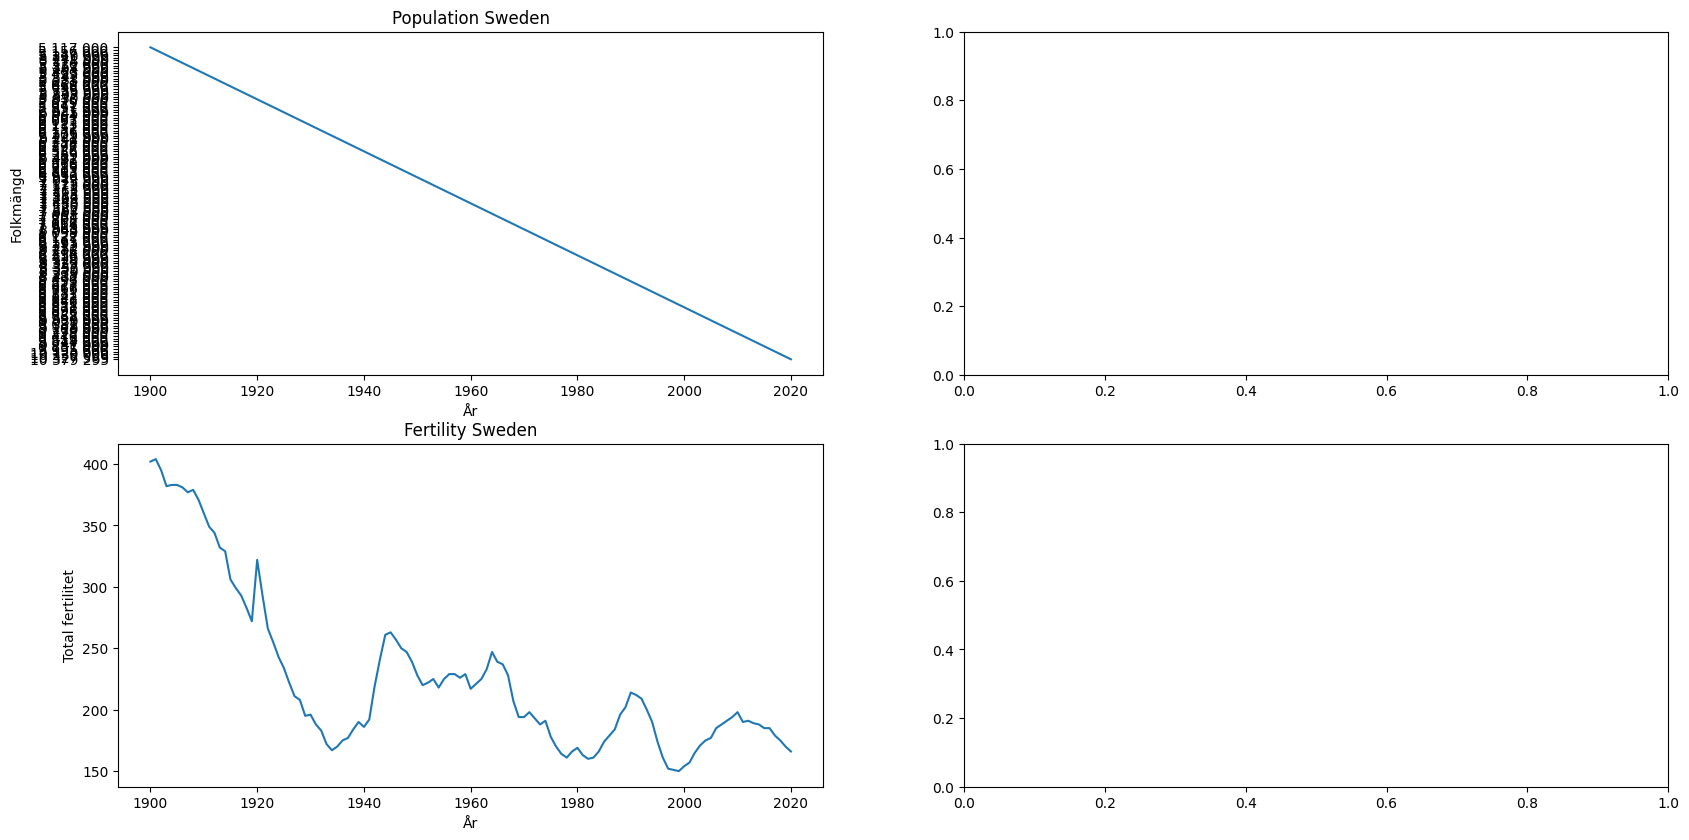

In [478]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, dpi=100, figsize=(20,10))

sns.lineplot(data=from1900, x="År", y="Folkmängd", ax = ax[0,0]).set_title("Population Sweden" )
sns.lineplot(data=from1900, x="År", y="Total fertilitet", ax = ax[1,0]).set_title("Fertility Sweden")
